<a href="https://colab.research.google.com/github/kshjessica/study_Machine-Learning/blob/main/Assignment1_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0%20%EA%B8%B0%EB%B0%98%20%ED%95%99%EC%8A%B5%20-%20%EB%8B%A8%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EA%B5%AC%ED%98%84_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [21-1 생체인증보안(01)] Assignment1
### 사이버보안전공 1971060 김서현
- **노드 개수 4**
- 활성화 함수 tanh
- 경사하강법의 학습율 0.00001
- **반복회수 10000회**

정확도가 높아졌던 두 가지 요소를 적용 해보았다.

***결과: 정확도가 1, 4 보다 낮아짐***  
***결과: 분리가 가장 선명하게 일어남***

## 필요한 모듈 불러오기



In [1]:
# 패키지 및 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [2]:
# 텐서플로우 버전 낮추기
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# 난수의 시드를 설정
np.random.seed(1971060)
tf.set_random_seed(1971060)

## 학습 데이터 생성하기

In [4]:
# 학습 데이터를 생성하기
def generate_datablock(n, mu, var, t):
  data= multivariate_normal(mu, np.eye(2)*var, n)
  df= DataFrame(data, columns=['x1','x2'])
  df['t'] = t
  return df

df0 = generate_datablock(1500, [7,7], 22, 1)
df1 = generate_datablock(1500, [22,7], 22, 0)
df2 = generate_datablock(1500, [7,22], 22, 1)
df3 = generate_datablock(1500, [22,22], 22, 0)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [5]:
# 학습 데이터 확인하기
train_set

,x1,x2,t
0,18.916773,14.813563,0
1,23.965116,25.908203,0
2,1.549466,15.486041,1
3,5.222163,6.051846,1
4,21.742111,15.056343,0
...,...,...,...
5995,23.649747,5.015362,0
5996,30.253416,19.643979,0
5997,6.061546,0.298473,1
5998,17.598992,7.257454,1


In [6]:
# (x1, x2)와 t를 각각 모은 것을 넘파이의 array 오브젝트로 추출해둔다.
train_x = train_set[['x1','x2']].to_numpy()
train_t = train_set['t'].to_numpy().reshape([len(train_set), 1])

## 목적함수(가설함수)로 단층 신경망 기반 이항 분류기 모델 정의
노드 개수 4로 변경 (num_units = 4)

In [7]:
# 단층 신경망을 이용한 이항 분류기 모델을 정의
num_units = 4
mult = train_x.flatten().mean() # x1,x2의 평균값

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units])) # 난수 발생
b1 = tf.Variable(tf.zeros([num_units]))

# hidden1 = tf.nn.relu(tf.matmul(x, w1)+ b1*mult)  #relu 이용
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult) #tanf 이용

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult) # 파라미터 최적화를 고속화 처리

In [8]:
p.shape

TensorShape([Dimension(None), Dimension(1)])

## Loss 함수(비용함수,오차함수), 학습 알고리즘(단계), 정답률 식 정의

In [9]:
# 오차 함수 loss, 트레이닝 알고리즘 train_step, 정답률 accuracy를 정의한다.
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
# 세션을 준비하고 variavle을 초기화한다.
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

## 학습(파라미터 최적화 반복 작업) 수행하기

In [11]:
# 파라미터 최적화를 10000회 반복한다.
i = 0
for _ in range(10000):
  i+=1
  sess.run(train_step, feed_dict={x:train_x, t:train_t})
  if i % 1000 == 0:
    loss_val, acc_val = sess.run(
        [loss, accuracy], feed_dict={x:train_x, t:train_t})
    print('Step: %d, Loss: %f, Accuracy: %f'
            %(i,loss_val, acc_val))

Step: 1000, Loss: 960.930725, Accuracy: 0.933000
Step: 2000, Loss: 922.052673, Accuracy: 0.934500
Step: 3000, Loss: 914.295898, Accuracy: 0.938000
Step: 4000, Loss: 915.199280, Accuracy: 0.938667
Step: 5000, Loss: 880.937866, Accuracy: 0.943833
Step: 6000, Loss: 879.675293, Accuracy: 0.944167
Step: 7000, Loss: 877.411804, Accuracy: 0.944333
Step: 8000, Loss: 884.167664, Accuracy: 0.944667
Step: 9000, Loss: 884.424683, Accuracy: 0.944667
Step: 10000, Loss: 2628.799072, Accuracy: 0.804833


## 확보한 확률을 색의 농담으로 차트 나타내기

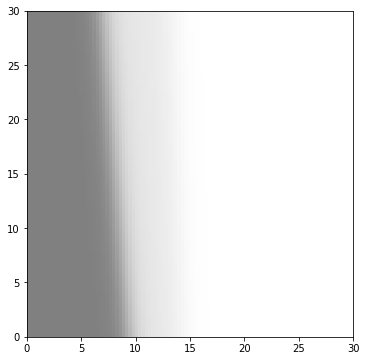

In [12]:
# 얻어진 확률을 색의 농담으로 그림에 표시한다.
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])

locations = []
for x2 in np.linspace(0,30,100):
  for x1 in np.linspace(0,30,100):
    locations.append((x1, x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)

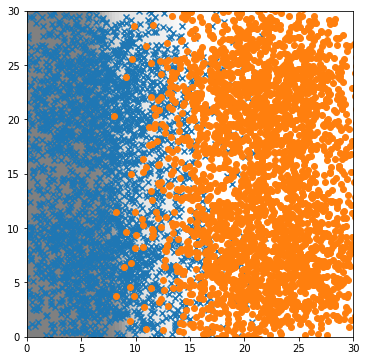

In [13]:
# 얻어진 확률을 색의 농담으로 그림에 표시한다.
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(0,30,100):
  for x1 in np.linspace(0,30,100):
    locations.append((x1, x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)